In [1]:
import pandas as pd
import json
import os
import seaborn as sns
import collections
import scipy.sparse as sp
import matplotlib.pyplot as plt
import itertools
import numpy as np
import langdetect
%matplotlib inline

# schemas

```json


{
    "business_id":"encrypted business id",
    "name":"business name",
    "neighborhood":"hood name",
    "address":"full address",
    "city":"city",
    "state":"state -- if applicable --",
    "postal code":"postal code",
    "latitude":latitude,
    "longitude":longitude,
    "stars":star rating, rounded to half-stars,
    "review_count":number of reviews,
    "is_open":0/1 (closed/open),
    "attributes":["an array of strings: each array element is an attribute"],
    "categories":["an array of strings of business categories"],
    "hours":["an array of strings of business hours"],
    "type": "business"
}

{
    "review_id":"encrypted review id",
    "user_id":"encrypted user id",
    "business_id":"encrypted business id",
    "stars":star rating, rounded to half-stars,
    "date":"date formatted like 2009-12-19",
    "text":"review text",
    "useful":number of useful votes received,
    "funny":number of funny votes received,
    "cool": number of cool review votes received,
    "type": "review"
}

{
    "user_id":"encrypted user id",
    "name":"first name",
    "review_count":number of reviews,
    "yelping_since": date formatted like "2009-12-19",
    "friends":["an array of encrypted ids of friends"],
    "useful":"number of useful votes sent by the user",
    "funny":"number of funny votes sent by the user",
    "cool":"number of cool votes sent by the user",
    "fans":"number of fans the user has",
    "elite":["an array of years the user was elite"],
    "average_stars":floating point average like 4.31,
    "compliment_hot":number of hot compliments received by the user,
    "compliment_more":number of more compliments received by the user,
    "compliment_profile": number of profile compliments received by the user,
    "compliment_cute": number of cute compliments received by the user,
    "compliment_list": number of list compliments received by the user,
    "compliment_note": number of note compliments received by the user,
    "compliment_plain": number of plain compliments received by the user,
    "compliment_cool": number of cool compliments received by the user,
    "compliment_funny": number of funny compliments received by the user,
    "compliment_writer": number of writer compliments received by the user,
    "compliment_photos": number of photo compliments received by the user,
    "type":"user"
}


{
    "time":["an array of check ins with the format day-hour:number of check ins from hour to hour+1"],
    "business_id":"encrypted business id",
    "type":"checkin"
}


{
    "text":"text of the tip",
    "date":"date formatted like 2009-12-19",
    "likes":compliment count,
    "business_id":"encrypted business id",
    "user_id":"encrypted user id",
    "type":"tip"
}

[
    {
        "photo_id": (encrypted photo id),
        "business_id" : (encrypted business id),
        "caption" : (the photo caption, if any),
        "label" : (the category the photo belongs to, if any)
    },
    {...}
]

```

In [2]:
BASE_PATH_YELP = '/media/i008/duzy1/yelp_dataset_challenge_round9/yelp_academic_dataset_{}.json'
PHOTOS = '/media/i008/duzy1/2016_yelp_dataset_challenge_photos/photo_id_to_business_id.json' 


y_bus = BASE_PATH_YELP.format('business')
y_checkin = BASE_PATH_YELP.format('checkin')
y_review = BASE_PATH_YELP.format('review')
y_tip = BASE_PATH_YELP.format('tip')
y_usr = BASE_PATH_YELP.format('user')

In [3]:
#helpers

def yelp_data_generator(file_path):
    with open(file_path) as f:
        for line in f:
            # yield the the data line-by-line
            yield json.loads(line.rstrip())
            

In [4]:
business = yelp_data_generator(y_bus)
checkins = yelp_data_generator(y_checkin)
reviews = yelp_data_generator(y_review)
tips = yelp_data_generator(y_tip)
users = yelp_data_generator(y_usr)
photos = yelp_data_generator(PHOTOS)

In [62]:
NROWS=None

df_business = pd.DataFrame.from_records(business, nrows=NROWS)
df_checkins = pd.DataFrame.from_records(checkins, nrows=NROWS)
# df_reviews = pd.DataFrame.from_records(reviews, nrows=50000) #really big carefull
df_tips = pd.DataFrame.from_records(tips, nrows=NROWS)
df_users= pd.DataFrame.from_records(users, nrows=NROWS)
df_photos = pd.DataFrame.from_records(photos.next())


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 106: ordinal not in range(128)


# brainstorming 


### Exploratory, basic preprocessing and questions to ask the dataset to get a feel of it.

 
#### 0) @business
>- process categories represented as lists [business-ds]
- stars distribiution based on business/categories
- stars vs number of reviews
- plot on globe(map) to see where the place are actually on the map.
- find new yorker?


#### 1) @reviews
>- usefull vs rating
- funny vs rating 
- stars distribiution (this one is enum {1,2,3,4,5})
- lenght of reviews (words) distribiution (might be needed to prepare embeddings etc)
- 


#### 2) @checkins
>- process checkin-array to display them as a proper histogram


#### 3) @users
>- some graph/netowork analysis could be helpfull here, but thats not simple(or fast) to implement


#### 4) @tips
>- 

#### 5) @photos
>- what labels do we have?
- how many photos are there without captions?
- simple image explorer (present images side by side)

### Ideas for more advanced classification, regression, clustering, exploration tasks


>- figure out usefull reviews (by text)
- figure out rating(stars) from review text
- image captioning -> generate image description.
- figure out candidates for fake reviews/reviewers
- find users that reviewed a lot of places wich are far apart from eachother
- inspect trends in review counts
- detect menus -> ocr -> index? (search for dishes in menus)
- review embeddings -> HDBSCAN (spot fake reviews?)
- review embeddings -> TSN-e -> see how far 5* are form 1*?  
(embedd lstm layer -> 2x lstm -> stars -> TSN-e visualziaction (using last LSTM-layer-output-values))



### Other (deploy etc)
>- bash/make file to download the files
- docker-compose thats adds the files and runs a proper notebook



# 0)

In [ ]:
#0

# #### 0) @business
# >- process categories represented as lists [business-ds]
# - stars distribiution based on business/categories
# - stars vs number of reviews
# - plot on globe(map) to see where the place are actually on the map.
# - find new yorker?




In [ ]:
# df_business['stars'].hist(bins=9)
plt.figure()
df_business.stars.hist(bins=9)
# plt.figure()
# df_business.stars.value_counts().plot(kind='bar')

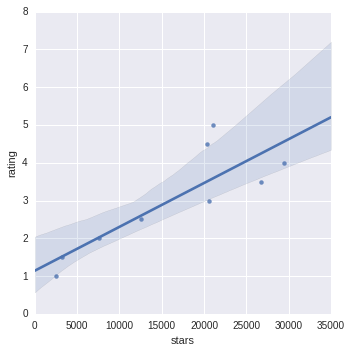

In [57]:
# sns.lmplot('stars','review_count',df_business[df_business.review_count>0])

vc = df_business.stars.value_counts()
vc = pd.DataFrame(vc)
vc['rating'] = vc.index.astype(float)
sns.lmplot('stars','rating', vc)


In [58]:
df_business[df_business.name.str.lower().str.contains('yorker')].tail(3)
#wohoo one new yorker in the dataset

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,type
28630,110 S Val Vista Dr,"[Alcohol: full_bar, BusinessAcceptsCreditCards...",Mg7AbrKjARuHBaixSk1AqA,"[American (Traditional), Restaurants]",Gilbert,None,0,33.347961,-111.757133,native new yorker,,85296,14,3.5,AZ,business
34329,2740 W Bell Rd,"[Alcohol: full_bar, Ambience: {'romantic': Fal...",wJKTZXmoSO_4oGwbKfF4JQ,"[American (Traditional), Restaurants]",Phoenix,None,0,33.640391,-112.119058,native new yorker,,85053,51,2.5,AZ,business
40335,14051 W Grand Ave,None,GYZuhAkNUegsaLyAyI9YNg,"[Sports Bars, Nightlife, Bars]",Surprise,None,0,33.651243,-112.366602,native new yorker,,85374,3,2.5,AZ,business
46378,25 Jocks Lodge,"[Alcohol: full_bar, BusinessAcceptsCreditCards...",JxMTifKFAKd3r5rSXQPTqg,"[Nightlife, Sports Bars, Pool Halls, Bars, Act...",Edinburgh,"[Monday 11:0-0:0, Tuesday 11:0-0:0, Wednesday ...",1,55.955162,-3.150050,the new yorker pool & snooker club,,EH8 7AA,3,4.0,EDH,business
67523,"3668 W Anthem Way, Ste B132","[Ambience: {'romantic': False, 'intimate': Fal...",jczUaabyGKOsRvQ7zTfj0Q,"[Chicken Wings, Restaurants]",Anthem,None,0,33.868744,-112.138732,native new yorker,,85086,4,3.0,AZ,business
79016,9030 E Via Linda,"[Alcohol: full_bar, BusinessAcceptsCreditCards...",Ejet48g6KOHRl7oNE9bMtg,"[Restaurants, American (Traditional)]",Scottsdale,None,0,33.569728,-111.886203,native new yorker,,85258,3,1.5,AZ,business
103022,,"[Alcohol: full_bar, Ambience: {'romantic': Fal...",5Q4Gw1pyZnG8IlFNozxIlw,[Restaurants],Gilbert,None,1,33.351930,-111.821087,native new yorker restaurant,,85233,17,3.0,AZ,business
109185,401 N Tryon St,"[Alcohol: beer_and_wine, Ambience: {'romantic'...",nowVNqKQekMLQQphP2lItA,"[Sandwiches, Event Planning & Services, Catere...",Charlotte,"[Monday 7:0-19:0, Tuesday 7:0-19:0, Wednesday ...",0,35.230190,-80.839603,jack's new yorker deli,Fourth Ward,28202,36,4.0,NC,business
115223,Königstr. 16,None,M0BgbKuUg8mIoNiafXw4qQ,"[Sports Wear, Sporting Goods, Men's Clothing, ...",Stuttgart,None,1,48.780800,9.180400,new yorker,,70173,5,5.0,BW,business
116194,530 N Estrella Pkwy,"[Alcohol: full_bar, Ambience: {'romantic': Fal...",vuarbVH02GIuZMbyNnimRw,"[Restaurants, American (Traditional)]",Goodyear,None,0,33.452341,-112.394066,native new yorker,,85338,21,2.5,AZ,business


In [81]:
df_business.loc[115223]

address                                              Königstr. 16
attributes                                                   None
business_id                                M0BgbKuUg8mIoNiafXw4qQ
categories      [Sports Wear, Sporting Goods, Men's Clothing, ...
city                                                    Stuttgart
hours                                                        None
is_open                                                         1
latitude                                                  48.7808
longitude                                                  9.1804
name                                                   New Yorker
neighborhood                                                     
postal_code                                                 70173
review_count                                                    5
stars                                                           5
state                                                          BW
type      

In [82]:
for i in df_business[df_business.categories.isnull()].index:
    df_business.set_value(i, 'categories', [])
X = pd.concat([pd.DataFrame(v, index=np.repeat(k,len(v))) for k,v in df_business.categories.to_dict().items()])  

X.columns = ['categories_exploded']
df_business = df_business.join(X)


In [95]:
plt.figure(figsize=(20,15))
df_business.categories_exploded.value_counts().sort_values(ascending=False)[:500]

Restaurants                      48485
Shopping                         22466
Food                             21189
Beauty & Spas                    13711
Home Services                    11241
Nightlife                        10524
Health & Medical                 10476
Bars                              9087
Automotive                        8554
Local Services                    8133
Event Planning & Services         7224
Active Life                       6722
Fashion                           5824
American (Traditional)            5312
Fast Food                         5250
Pizza                             5229
Sandwiches                        5220
Coffee & Tea                      5099
Hair Salons                       4858
Hotels & Travel                   4857
Arts & Entertainment              4721
Italian                           4118
Auto Repair                       4102
Home & Garden                     4094
Burgers                           3868
Mexican                  

In [109]:
print('unique categories:')
print(df_business.categories_exploded.unique().shape)


top200categories = df_business.categories_exploded.value_counts().sort_values(ascending=False)[:200]
tcin = top200categories.index
df_business[df_business.categories_exploded.isin(tcin)].groupby('categories_exploded')['stars'].mean().sort_values(ascending=False)

unique categories:
(1192,)


categories_exploded
Massage Therapy             4.483927
Photographers               4.480469
Chiropractors               4.439512
Makeup Artists              4.397351
Hair Extensions             4.380208
Tattoo                      4.361338
Hair Stylists               4.317562
Real Estate Agents          4.268608
Art Galleries               4.261384
Waxing                      4.244565
Eyelash Service             4.212042
Physical Therapy            4.193739
Lawyers                     4.191682
Yoga                        4.183995
Fitness & Instruction       4.181999
Cosmetic Dentists           4.159184
Auto Glass Services         4.144301
Pet Boarding/Pet Sitting    4.143868
Skin Care                   4.135967
Food Trucks                 4.119361
Hair Removal                4.116487
Tours                       4.111588
Carpet Cleaning             4.110544
Trainers                    4.109139
Parks                       4.103836
Party & Event Planning      4.101571
Dentists          

# 1)

In [6]:
reviews = yelp_data_generator(y_review)
# df_reviews = pd.DataFrame.from_records(reviews, nrows=4000000, coerce_float=True, exclude=['business_id','review_id','user_id','date','type']) #really big carefull

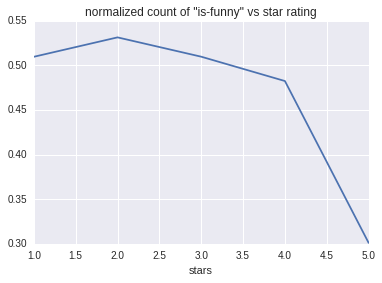

In [28]:
(df_reviews[df_reviews.funny>=0].groupby('stars')['funny'].sum()/df_reviews.stars.value_counts()).plot()
plt.title('normalized count of "is-funny" vs star rating')
plt.xlabel('stars')

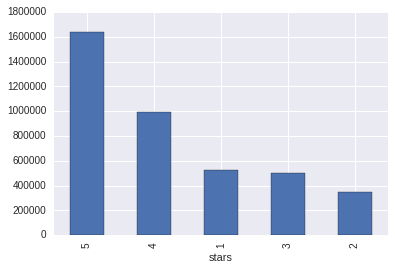

In [36]:
df_reviews.stars.value_counts().plot(kind='bar')
plt.xlabel('stars')

In [5]:
df_reviews = pd.read_csv('reviews.csv', encoding='utf-8')
lens = df_reviews.text.str.len()
lens.describe()

/home/i008/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/i008/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


count    3.999999e+06
mean     6.308050e+02
std      5.849629e+02
min      1.000000e+00
25%               NaN
50%               NaN
75%               NaN
max      5.000000e+03
Name: text, dtype: float64

In [47]:
df_reviews.head()

,Unnamed: 0,cool,funny,stars,text,useful
0,0,0,0.0,5.0,If you enjoy service by someone who is as comp...,0.0
1,1,0,0.0,5.0,After being on the phone with Verizon Wireless...,1.0
2,2,0,0.0,5.0,Great service! Corey is very service oriented....,0.0
3,3,1,0.0,5.0,Highly recommended. Went in yesterday looking ...,0.0
4,4,0,0.0,4.0,I walked in here looking for a specific piece ...,0.0


In [13]:
import langdetect #wow there really is a pip package for everything for everything

In [ ]:
count = 0
def safe_detect(s):
    try:
        global count
        count+=1    
        if count % 10000 == 0:
            print(count)       
        return langdetect.detect(s)
    except:
        return 'unknown'

# 
df_reviews['language'] = df_reviews.text.apply(safe_detect)
# df_reviews.to_csv('reviews_with_language.csv', encoding='utf-8')

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [18]:
safe_detect(df_reviews.text[100])

'en'

In [69]:
df_reviews[df_reviews.language == 'pl']
#language detection seems to be working quite good!, good!

,Unnamed: 0,cool,funny,stars,text,useful,language
14611,14611,0,0.0,5.0,Bardzo przyjemne miejsce chyba stosunkowo now...,0.0,pl
69686,69686,0,0.0,5.0,"Najsmaczniej, najczyściej, bardzo kulturalna i...",0.0,pl
82717,82717,0,0.0,2.0,Przyciągnągnęła mnie do tego miejsca lecąca z ...,0.0,pl
155122,155122,0,0.0,5.0,Marcy Macgregor rocks my socks!,0.0,pl
166248,166248,0,0.0,2.0,"Bardzo zła, pracownicy nie mają pojęcia, gotow...",0.0,pl
213463,213463,0,0.0,4.0,nice :) pizza schmeckt gut :),0.0,pl
606531,606531,0,1.0,5.0,Późno w nocy poszliśmy ale bardzo nam sie podo...,0.0,pl
883276,883276,0,0.0,4.0,Wracając z delegacji w Stanach miałem okazję s...,1.0,pl
900632,900632,0,0.0,4.0,Best new york style pizza dt!,0.0,pl
1566009,1566009,0,0.0,5.0,"Fantastyczne miejsce na imprezę, szczególnie, ...",0.0,pl


# 2)